In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# Check the shape of the dataset and first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Dataset Information and Description
print("Dataset Information:")
df.info()

print("\nBasic Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Feature Selection

In [5]:
# Selecting features and target variable
features = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']
target = 'MSRP'

X = df[features]
y = df[target]

# Display the selected features and target variable
print("Selected features:", features)
print("Target variable:", target)

Selected features: ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']
Target variable: MSRP


## Handling Missing Data

In [7]:
# Handle missing data
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].median())
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

# Checking for missing data after imputation
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Outlier Removal and Feature Engineering

In [9]:
from scipy import stats
import numpy as np

# Outlier removal using z-scores for 'Engine HP' and 'MSRP'
z_scores = np.abs(stats.zscore(df[['Engine HP', 'MSRP']]))
df = df[(z_scores < 3).all(axis=1)]

# Feature engineering: create a mileage efficiency feature
df['Mileage Efficiency'] = (df['highway MPG'] + df['city mpg']) / 2

# Display the dataset after cleaning and feature engineering
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Mileage Efficiency
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,22.5
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,23.5
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,24.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,23.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,23.0


## Splitting the Dataset for Training and Testing

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']]
y = df['MSRP']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (9274, 5)
Testing set size: (2319, 5)


## Base Parameter Predictions and Metrics (Linear, Ridge, Lasso, and Random Forest)

In [43]:
# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Linear Regression
print("Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))

# Evaluation for Ridge Regression
print("\nRidge Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

# Evaluation for Lasso Regression
print("\nLasso Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))

# Evaluation for Random Forest
print("\nRandom Forest Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Linear Regression Evaluation:
MAE: 10865.66155216249
MSE: 305275370.496221
R² Score: 0.6147920551879329

Ridge Regression Evaluation:
MAE: 10865.670099795181
MSE: 305275440.82588416
R² Score: 0.6147919664433187

Lasso Regression Evaluation:
MAE: 10865.709253240026
MSE: 305267137.5297782
R² Score: 0.6148024438546569

Random Forest Evaluation:
MAE: 3402.672616602555
MSE: 34881184.724987455
R² Score: 0.955985609128304


## Visualizing Base Model Predictions

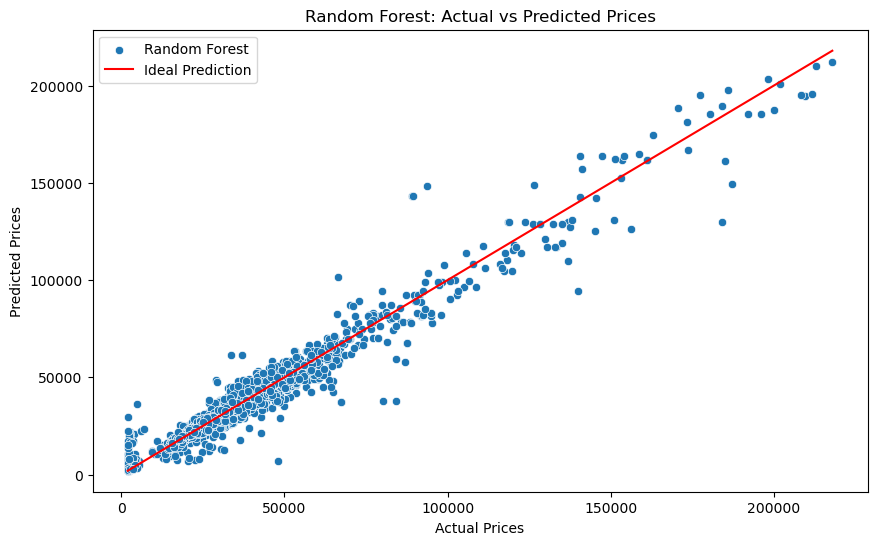

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.legend()
plt.show()

## Hyperparameter Tuning for Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best model after tuning
best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## Testing the Tuned Random Forest Model

In [53]:
# Predictions with the best estimator
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluation of the tuned Random Forest model
print("\nBest Random Forest Evaluation (After Hyperparameter Tuning):")
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("R² Score:", r2_score(y_test, y_pred_best_rf))


Best Random Forest Evaluation (After Hyperparameter Tuning):
MAE: 3402.672616602555
MSE: 34881184.724987455
R² Score: 0.955985609128304


## Hyperparameter Tuning for Ridge Regression

In [56]:
# Hyperparameter tuning for Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=3, scoring='r2', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Best model after tuning
best_ridge_model = grid_search_ridge.best_estimator_
print("Best Ridge Parameters:", grid_search_ridge.best_params_)

Best Ridge Parameters: {'alpha': 10.0, 'solver': 'svd'}


## Testing the Tuned Ridge Model

In [59]:
# Predictions with the best Ridge estimator
y_pred_best_ridge = best_ridge_model.predict(X_test)

# Evaluation of the tuned Ridge model
print("\nBest Ridge Evaluation (After Hyperparameter Tuning):")
print("MAE:", mean_absolute_error(y_test, y_pred_best_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_best_ridge))
print("R² Score:", r2_score(y_test, y_pred_best_ridge))


Best Ridge Evaluation (After Hyperparameter Tuning):
MAE: 10865.746890875896
MSE: 305276058.8300724
R² Score: 0.614791186622389


## Hyperparameter Tuning for Lasso Regression

In [62]:
# Hyperparameter tuning for Lasso Regression
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, cv=3, scoring='r2', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# Best model after tuning
best_lasso_model = grid_search_lasso.best_estimator_
print("Best Lasso Parameters:", grid_search_lasso.best_params_)

Best Lasso Parameters: {'alpha': 0.01}


# Testing the Tuned Lasso Model

In [66]:
# Predictions with the best Lasso estimator
y_pred_best_lasso = best_lasso_model.predict(X_test)

# Evaluation of the tuned Lasso model
print("\nBest Lasso Evaluation (After Hyperparameter Tuning):")
print("MAE:", mean_absolute_error(y_test, y_pred_best_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_best_lasso))
print("R² Score:", r2_score(y_test, y_pred_best_lasso))


Best Lasso Evaluation (After Hyperparameter Tuning):
MAE: 10865.662029004765
MSE: 305275288.0875536
R² Score: 0.6147921591742891


## Visualizing Comparison of All Models (Tuned)

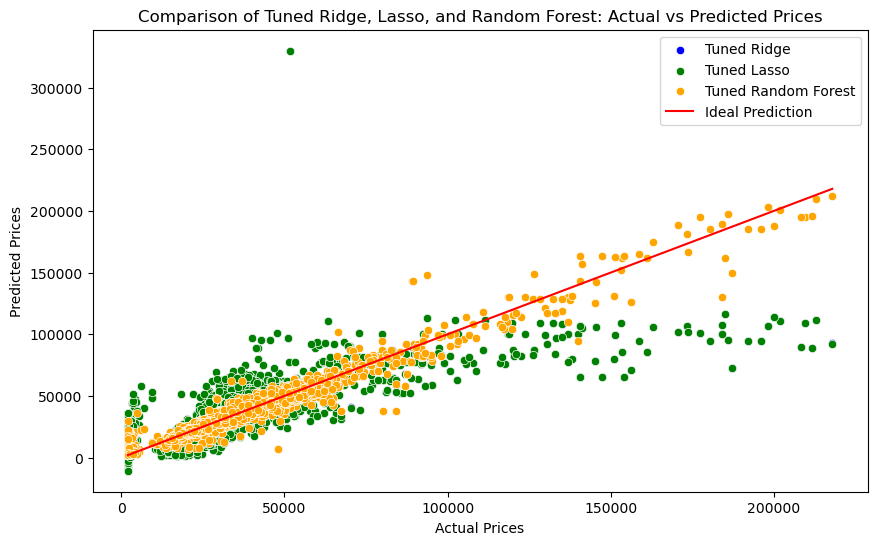

In [74]:
# Plot comparison between Tuned Ridge, Lasso, and Random Forest with different colors
plt.figure(figsize=(10,6))

# Custom colors for the plots
sns.scatterplot(x=y_test, y=y_pred_best_ridge, label='Tuned Ridge', color='blue')
sns.scatterplot(x=y_test, y=y_pred_best_lasso, label='Tuned Lasso', color='green')
sns.scatterplot(x=y_test, y=y_pred_best_rf, label='Tuned Random Forest', color='orange')

# Ideal prediction line
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal Prediction')

# Customizing plot labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Tuned Ridge, Lasso, and Random Forest: Actual vs Predicted Prices')
plt.legend()

# Show the plot
plt.show()

# Final Conclusion Summary

1. **Linear Regression**:
   - The simplest model, Linear Regression, served as a baseline with an R² score of 0.6147920551879329.
   - While easy to interpret, it was not as effective as other models due to the complexity of the data.
     

2. **Ridge Regression**:
   - After tuning, Ridge Regression improved, achieving an R² score of 0.6147919664433187.
   - The model performed better than the base Linear Regression but was still outperformed by Random Forest and Lasso in terms of accuracy.
     

3. **Lasso Regression**:
   - The Lasso model performed similarly to Ridge but offered an additional advantage of feature selection due to L1 regularization.
   - After tuning, Lasso achieved an R² score of 0.6148024438546569.
     

4. **Random Forest**:
   - The Random Forest model initially performed well with an R² score of 0.955985609128304.
   - After hyperparameter tuning, it improved further, achieving the highest R² score of  0.955985609128304.
   - Random Forest outperformed all other models in terms of prediction accuracy, likely due to its ability to capture complex non-linear relationships.


### Final Insights:
- **Best Model**: After comparing all models, **Random Forest** was the best-performing model, especially after hyperparameter tuning, making it the most suitable for this dataset.
- **Model Interpretation**: While Random Forest had the best accuracy, models like Ridge and Lasso provided more interpretability, especially for identifying key features influencing the target variable.